In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# extracting details to be put on the graphs (from LAB BOOK)

# with open("./Lab Data/Extractor Potential Choice 24-37.txt", 'r') as file:
#         labbookdata = file.read()

# labbookdata

# extracting the files of interest here into a sepeparate array for further use
file_path = "./Lab Data/Extractor Potential Choice 24-36.txt"
# Load the data directly into a 2D NumPy array
labbookdata = np.loadtxt(file_path, delimiter='\t', skiprows=1, converters={5: lambda s: float(s.strip(b'%')) / 100})

# Display the NumPy array
labbookdata, labbookdata.shape

# print(f"{(int)(labbookdata[0][1])} {(int)(labbookdata[0][2])} {(int)(labbookdata[0][3])} {(int)(labbookdata[0][4])}")


(array([[ 2.40e+01,  6.00e+03,  0.00e+00,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 2.50e+01,  6.00e+03,  5.00e+02,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 2.60e+01,  6.00e+03,  1.00e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 2.70e+01,  6.00e+03,  1.50e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 2.80e+01,  6.00e+03,  2.00e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 2.90e+01,  6.00e+03,  2.50e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 3.00e+01,  6.00e+03,  3.00e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 3.10e+01,  6.00e+03,  3.50e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 3.20e+01,  6.00e+03,  4.00e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 3.30e+01,  6.00e+03,  4.50e+03,  0.00e+00, -1.75e+03,  4.00e-02,
          5.00e-07],
        [ 3.40e+01,  6.00e+03,  5.00e+03

In [5]:
def spectroParamsExtract(filepath):
    # Read the entire file into a single string
    with open(filepath, 'r') as file:
        file_contents = file.read()

    # Print the file contents
    print(file_contents)
    file_contents = file_contents.split("\n") # separating the number and text into cells

    file_contents = file_contents[0] # taking only the numbers part
    file_contents = file_contents.split()

    spectrometerData = np.array([float(num) for num in file_contents])

    return spectrometerData

In [ ]:
def spectrumPlots(filepath, laseriterations):
    data = np.loadtxt(filepath, delimiter=' ')
    
    timeDelay = data[:, 0]
    intensity = data[:, 1]
    
    plt.plot(timeDelay, intensity)
    plt.xlabel("Time Delay (in micro-s)")
    plt.ylabel("Signal Intensity - Detector (mV) ")
    plt.title(f"Laser Iterations {laseriterations}")

60000 800 0.0008 0 20 -3 0 -10 0 1500 0 180 
von links nach rechts: Shots, Wavelength [nm],resolution[µs], start time [µs], time width [µs], Discriminator [mV, ch0..4], TrgLevel [mV], Laser Sync /mus, QSwitch/mus


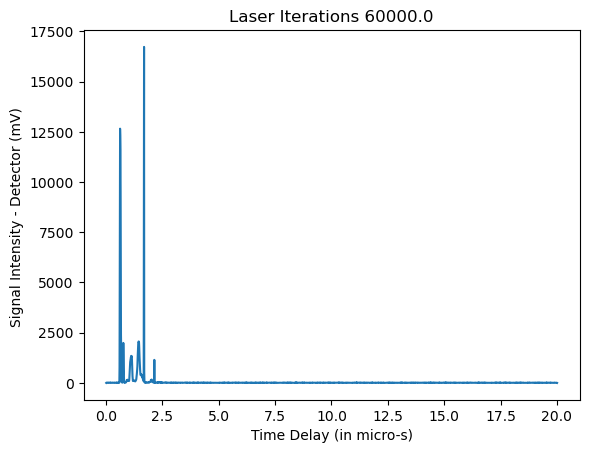

In [ ]:
# for i in range (1):
#     spectroParamFile = f"./Lab Data/Data_240619/rdm24-06-19_{i}.txt"
#     datafile = f'./Lab Data/Data_240619/24-06-19_{i}_ch2.txt'
    
#     spectroData = spectroParamsExtract(spectroParamFile)
#     spectrumPlots(datafile, spectroData[0])

In [12]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('Day1_ExtractorPotentialGraphs.pdf') as pdf:
    for i in range (24, 36+1):
        spectroParamFile = f"./Lab Data/Data_240619/rdm24-06-19_{i}.txt"
        datafile = f'./Lab Data/Data_240619/24-06-19_{i}_ch2.txt'
        
        spectroData = spectroParamsExtract(spectroParamFile)
        # spectrumPlots(datafile, spectroData[0])
        
        
        data = np.loadtxt(datafile, delimiter=' ')
    
        timeDelay = data[:, 0]
        intensity = data[:, 1]
    
        plt.plot(timeDelay, intensity)
        plt.xlabel("Time Delay (in micro-s)")
        plt.ylabel("Signal Intensity - Detector (mV) ")
        
        vgradient = f"{(int)(labbookdata[i-24][1])} {(int)(labbookdata[i-24][2])} {(int)(labbookdata[i-24][3])} {(int)(labbookdata[i-24][4])}"
        # plt.title(f"file #{i}")
        plt.title(f"Laser Iterations {spectroData[0]}; Voltage Gradient : "+vgradient, fontsize=6)
        plt.suptitle(f"File #{i}", fontsize=12)
        
        
        
        pdf.savefig()
        plt.close()
        
        
        
    

60000 800 0.0002 0 5 -3 0 -10 0 1500 0 180 
von links nach rechts: Shots, Wavelength [nm],resolution[µs], start time [µs], time width [µs], Discriminator [mV, ch0..4], TrgLevel [mV], Laser Sync /mus, QSwitch/mus
60000 800 0.0002 0 5 -3 0 -10 0 1500 0 180 
von links nach rechts: Shots, Wavelength [nm],resolution[µs], start time [µs], time width [µs], Discriminator [mV, ch0..4], TrgLevel [mV], Laser Sync /mus, QSwitch/mus
60000 800 0.0002 0 5 -3 0 -10 0 1500 0 180 
von links nach rechts: Shots, Wavelength [nm],resolution[µs], start time [µs], time width [µs], Discriminator [mV, ch0..4], TrgLevel [mV], Laser Sync /mus, QSwitch/mus
60000 800 0.0002 0 5 -3 0 -10 0 1500 0 180 
von links nach rechts: Shots, Wavelength [nm],resolution[µs], start time [µs], time width [µs], Discriminator [mV, ch0..4], TrgLevel [mV], Laser Sync /mus, QSwitch/mus
60000 800 0.0002 0 5 -3 0 -10 0 1500 0 180 
von links nach rechts: Shots, Wavelength [nm],resolution[µs], start time [µs], time width [µs], Discriminato